# Credit Card Fraud

In [39]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids
%matplotlib inline

In [40]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Background

This is a dataset for credit card fraud, containing credit card transactions from September 2013 by European cardholders. The features have already been transformed using PCA. Thus, we will skip feature engineering, since it has already been accounted for, and we cannot obtain the original set of features. The dataset contains transactions made across two days, with a total of 492 frauds out of 284,807 transactions. There is significant class imbalance, as the fraudulent transactions only represent 0.172% of all the transactions, which we can see by printing the value counts for the `Class` feature.

In [41]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [42]:
fraud_ratio = df['Class'].value_counts()[1]/(df['Class'].value_counts()[0]+df['Class'].value_counts()[1])
print('Non-fraud ratio: ', 100*(1-fraud_ratio), '%')

Non-fraud ratio:  99.82725143693798 %


Text(0,0.5,'Count')

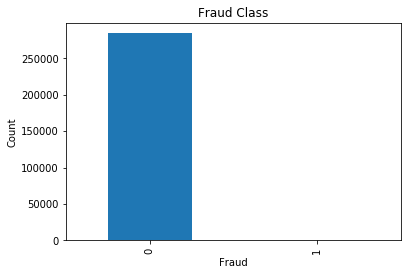

In [43]:
pd.value_counts(df['Class']).plot.bar()
plt.title('Fraud Class')
plt.xlabel('Fraud')
plt.ylabel('Count')

In [44]:
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression - Original Dataset

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score with 30% Holdout: 
 99.9204147794436 %


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

Cross Validation Scores: 
 [0.99903444 0.99931533 0.99894665 0.99931532 0.99903443]


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

Average Cross Validation Score: 
 99.91292345647828 %
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85322
           1       0.78      0.61      0.69       121

    accuracy                           1.00     85443
   macro avg       0.89      0.81      0.84     85443
weighted avg       1.00      1.00      1.00     85443



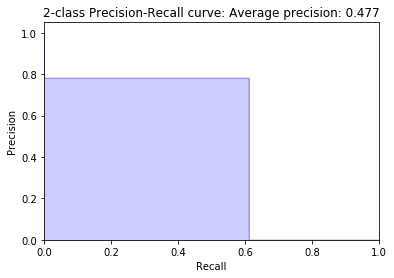

In [46]:
lr = linear_model.LogisticRegression(penalty='l1', C=0.5)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Score with 30% Holdout: \n", 100*lr.score(X_test, y_test), '%')
print("Cross Validation Scores: \n", cross_val_score(lr, X, y, cv=5))
print("Average Cross Validation Score: \n", 100*cross_val_score(lr, X, y, cv=5).mean(), '%')
print("Classification Report: \n", classification_report(y_test, y_pred))

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average precision: {0:0.3f}'.format(
    average_precision));

# Random Forest - Original Dataset

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score With 30% Holdout: 
 99.94967405170698 %
Cross Validation Scores: 
 [0.99899933 0.99961378 0.99915732 0.99950844 0.99935043]
Average Cross Validation Score: 
 99.93539487345163 %
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85322
           1       0.89      0.74      0.81       121

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



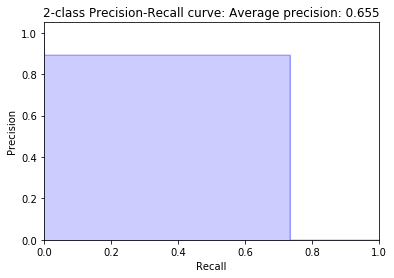

In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Score With 30% Holdout: \n", 100*rfc.score(X_test, y_test), '%')
print("Cross Validation Scores: \n", cross_val_score(rfc, X, y, cv=5))
print("Average Cross Validation Score: \n", 100*cross_val_score(rfc, X, y, cv=5).mean(), '%')
print("Classification Report: \n", classification_report(y_test, y_pred))

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average precision: {0:0.3f}'.format(
    average_precision));

By doing a Random Forest Classifier with a 30% holdout group, we get an accuracy score of 99.95%. Cross validation, on the other hand, results in a slightly lower accuracy score of 99.93%. However, both of these results are essentially meaningless, as 99.83% of the data is not classified as fraud anyways. Thus, we need a different model to evaluate this dataset and be able to reliably predict fraud.

# Logistic Regression - Balanced Cost Function

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver

Score with 30% Holdout: 
 97.78799901688845 %


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to co

Cross Validation Scores: 
 [0.97642288 0.98593799 0.9647127  0.96313267 0.97793227]


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver

Average Cross Validation Score: 
 97.36206796728955 %
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85322
           1       0.06      0.92      0.11       121

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



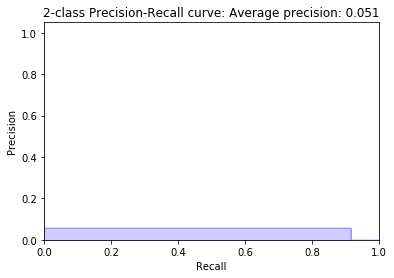

In [48]:
lr = linear_model.LogisticRegression(penalty='l1', C=0.5, class_weight='balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

cv = cross_val_score(lr, X, y, cv=5)

print("Score with 30% Holdout: \n", 100*lr.score(X_test, y_test), '%')
print("Cross Validation Scores: \n", cross_val_score(lr, X, y, cv=5))
print("Average Cross Validation Score: \n", 100*cross_val_score(lr, X, y, cv=5).mean(), '%')
print("Classification Report: \n", classification_report(y_test, y_pred))

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average precision: {0:0.3f}'.format(
    average_precision));

# Random Forest - Balanced Cost Function

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score With 30% Holdout: 
 99.94265182636377 %
Cross Validation Scores: 
 [0.99903444 0.99963133 0.99915732 0.99942066 0.9994031 ]
Average Cross Validation Score: 
 99.9209991635605 %
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85322
           1       0.92      0.65      0.76       121

    accuracy                           1.00     85443
   macro avg       0.96      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



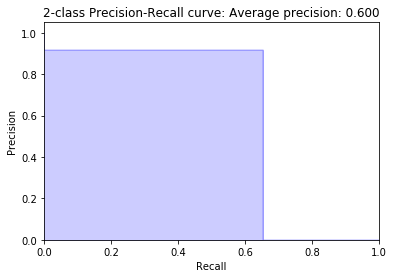

In [49]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Score With 30% Holdout: \n", 100*rfc.score(X_test, y_test), '%')
print("Cross Validation Scores: \n", cross_val_score(rfc, X, y, cv=5))
print("Average Cross Validation Score: \n", 100*cross_val_score(rfc, X, y, cv=5).mean(), '%')
print("Classification Report: \n", classification_report(y_test, y_pred))

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average precision: {0:0.3f}'.format(
    average_precision));

1) Use undersampling/oversampling techniques to rebalance the dataset

# SMOTE Oversampling

In [50]:
#Perform oversampling using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 284315, 1: 284315})


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

# Logistic Regression - SMOTE

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to 

Score with 30% Holdout: 
 96.02729367075251 %


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver

Cross Validation Scores: 
 [0.97640532 0.98593799 0.9647127  0.96313267 0.97793227]


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to co

Average Cross Validation Score: 
 97.36241909088483 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     85298
           1       0.98      0.94      0.96     85291

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



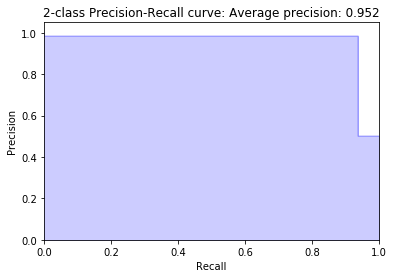

In [52]:
lr = linear_model.LogisticRegression(penalty='l1', C=0.5, class_weight='balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

cv = cross_val_score(lr, X, y, cv=5)

print("Score with 30% Holdout: \n", 100*lr.score(X_test, y_test), '%')
print("Cross Validation Scores: \n", cross_val_score(lr, X, y, cv=5))
print("Average Cross Validation Score: \n", 100*cross_val_score(lr, X, y, cv=5).mean(), '%')
print("Classification Report: \n", classification_report(y_test, y_pred))

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, step='post', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average precision: {0:0.3f}'.format(
    average_precision));

# Random Forest - SMOTE

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score With 30% Holdout: 
 95.6081081081081 %
Cross Validation Scores: 
 [0.99887644 0.99957867 0.9992451  0.99926265 0.9994031 ]
Average Cross Validation Score: 
 99.93188367448313 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       151
           1       0.99      0.92      0.95       145

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



Text(0.5,1,'2-class Precision-Recall curve: Average precision: 0.951')

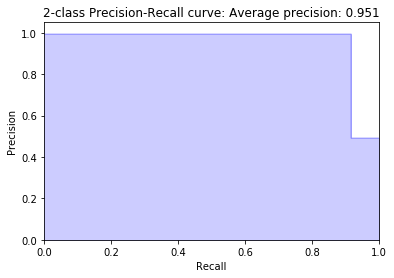

In [58]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Score With 30% Holdout: \n", 100*rfc.score(X_test, y_test), '%')
print("Cross Validation Scores: \n", cross_val_score(rfc, X, y, cv=5))
print("Average Cross Validation Score: \n", 100*cross_val_score(rfc, X, y, cv=5).mean(), '%')
print("Classification Report: \n", classification_report(y_test, y_pred))

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: Average precision: {0:0.3f}'.format(
    average_precision))
